<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/agrismartsystem/blob/main/AnaliseSensor/dadossensorPHBaixo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import json

if __name__ == "__main__":

    json_file = open("/content/firebasebancopHBaixo.json")
    dic = json.load(json_file)
    print(dic)

    arr = []

    for item in dic:
        arr.append(dic[item])

    print(arr)

{'1672492475': {'humidity': '100', 'pH': '5.06', 'temperature': '26.69', 'timestamp': '1672492475'}, '1672492574': {'humidity': '100', 'pH': '5.66', 'temperature': '26.81', 'timestamp': '1672492574'}, '1672493174': {'humidity': '100', 'pH': '5.88', 'temperature': '26.81', 'timestamp': '1672493174'}, '1672493774': {'humidity': '100', 'pH': '5.86', 'temperature': '26.81', 'timestamp': '1672493774'}, '1672494374': {'humidity': '100', 'pH': '5.89', 'temperature': '27.25', 'timestamp': '1672494374'}, '1672494974': {'humidity': '100', 'pH': '5.64', 'temperature': '27.31', 'timestamp': '1672494974'}, '1672495466': {'humidity': '100', 'pH': '5.42', 'temperature': '25.56', 'timestamp': '1672495466'}, '1672496067': {'humidity': '0', 'pH': '5.28', 'temperature': '26.25', 'timestamp': '1672496067'}, '1672496667': {'humidity': '0', 'pH': '5.17', 'temperature': '26.56', 'timestamp': '1672496667'}, '1672497315': {'humidity': '0', 'pH': '5.74', 'temperature': '26.62', 'timestamp': '1672497315'}, '1672

In [190]:
import pandas as pd
dfra = pd.DataFrame(columns=["humidity","pH","temperature","timestamp"])

In [191]:
for i in range(0, len(arr)):
  currentItem = arr[i]
  dfra.loc[i] = [arr[i]["humidity"], arr[i]["pH"], arr[i]["temperature"], arr[i]["timestamp"]]

In [192]:
dfra

,humidity,pH,temperature,timestamp
0,100,5.06,26.69,1672492475
1,100,5.66,26.81,1672492574
2,100,5.88,26.81,1672493174
3,100,5.86,26.81,1672493774
4,100,5.89,27.25,1672494374
...,...,...,...,...
1659,0,5.88,26.94,1673651930
1660,100,5.91,27.00,1673652531
1661,100,5.89,26.94,1673653131
1662,100,5.91,26.94,1673653731


In [193]:
print(dfra.dtypes)

humidity       object
pH             object
temperature    object
timestamp      object
dtype: object


In [194]:
dfra['timestamp'] = dfra['timestamp'].astype(int)
dfra['humidity'] = dfra['humidity'].astype(float)
dfra['pH'] = dfra['pH'].astype(float)
dfra['temperature'] = dfra['temperature'].astype(float)

In [195]:
print(dfra.dtypes)

humidity       float64
pH             float64
temperature    float64
timestamp        int64
dtype: object


In [196]:
dfra['Datetime'] = pd.to_datetime(dfra['timestamp'],
                                  unit='s')

In [197]:
dfra['Datetime']

0      2022-12-31 13:14:35
1      2022-12-31 13:16:14
2      2022-12-31 13:26:14
3      2022-12-31 13:36:14
4      2022-12-31 13:46:14
               ...        
1659   2023-01-13 23:18:50
1660   2023-01-13 23:28:51
1661   2023-01-13 23:38:51
1662   2023-01-13 23:48:51
1663   2023-01-13 23:58:51
Name: Datetime, Length: 1664, dtype: datetime64[ns]

In [198]:
dfra

,humidity,pH,temperature,timestamp,Datetime
0,100.0,5.06,26.69,1672492475,2022-12-31 13:14:35
1,100.0,5.66,26.81,1672492574,2022-12-31 13:16:14
2,100.0,5.88,26.81,1672493174,2022-12-31 13:26:14
3,100.0,5.86,26.81,1672493774,2022-12-31 13:36:14
4,100.0,5.89,27.25,1672494374,2022-12-31 13:46:14
...,...,...,...,...,...
1659,0.0,5.88,26.94,1673651930,2023-01-13 23:18:50
1660,100.0,5.91,27.00,1673652531,2023-01-13 23:28:51
1661,100.0,5.89,26.94,1673653131,2023-01-13 23:38:51
1662,100.0,5.91,26.94,1673653731,2023-01-13 23:48:51


In [199]:
## features 

features_3 = ['temperature', 'humidity', 'pH']

features = dfra[features_3]
features.index = dfra['Datetime']
features.head()

,temperature,humidity,pH
Datetime,,,
2022-12-31 13:14:35,26.69,100.0,5.06
2022-12-31 13:16:14,26.81,100.0,5.66
2022-12-31 13:26:14,26.81,100.0,5.88
2022-12-31 13:36:14,26.81,100.0,5.86
2022-12-31 13:46:14,27.25,100.0,5.89


In [200]:
features.describe()

,temperature,humidity,pH
count,1664.000000,1664.000000,1664.000000
mean,26.456070,65.925481,5.546851
std,0.320233,47.410230,0.244563
min,25.560000,0.000000,4.830000
25%,26.250000,0.000000,5.450000
50%,26.440000,100.000000,5.590000
75%,26.690000,100.000000,5.710000
max,27.310000,100.000000,5.990000


In [201]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

mpl.rcParams['figure.figsize'] = (16,8)
mpl.rcParams['axes.grid'] = False

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbd5d7d1c0>,
      dtype=object)

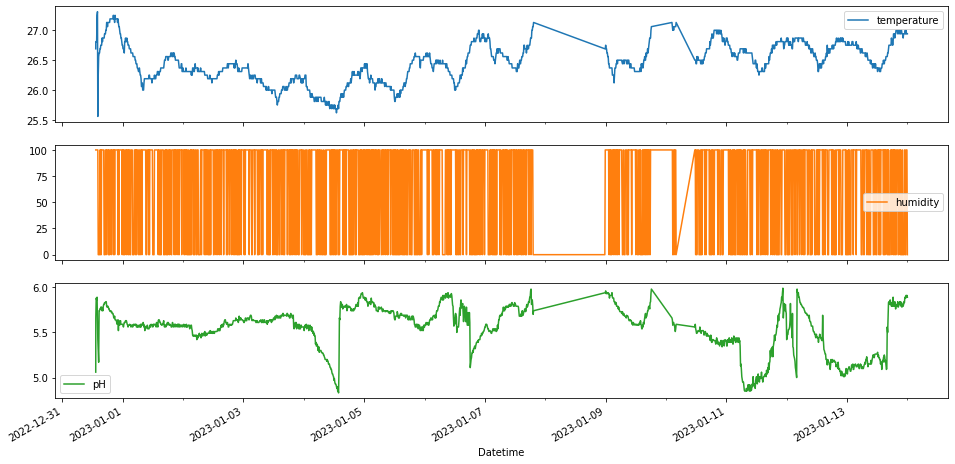

In [202]:
features.plot(subplots=True)

In [203]:
cP = features['pH']
var = np.var(cP)

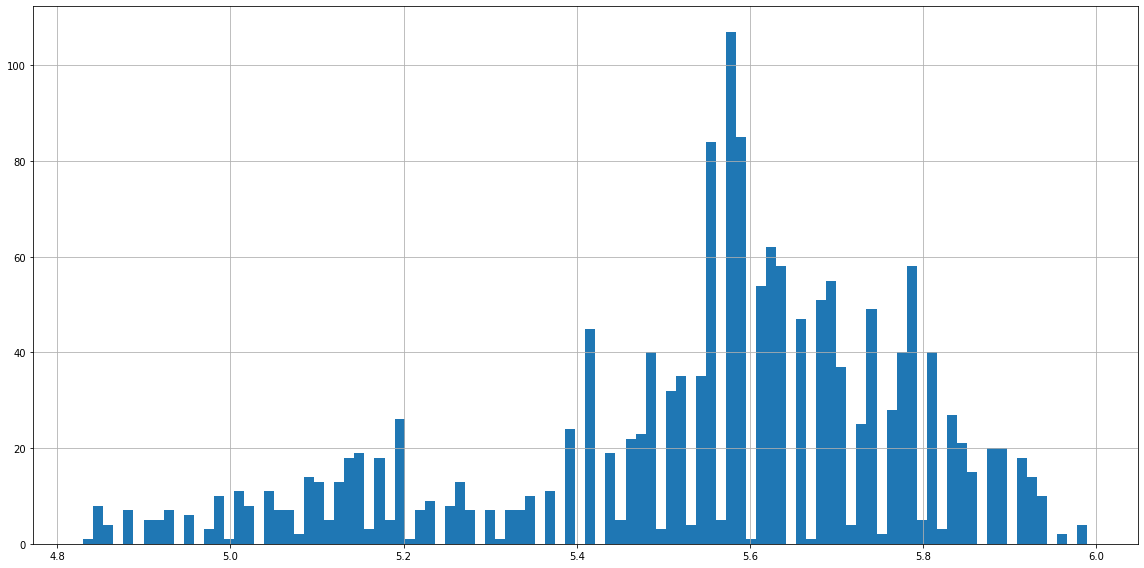

In [204]:
# Valores que aparecem no grafico de pH
features['pH'].hist(bins=100)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


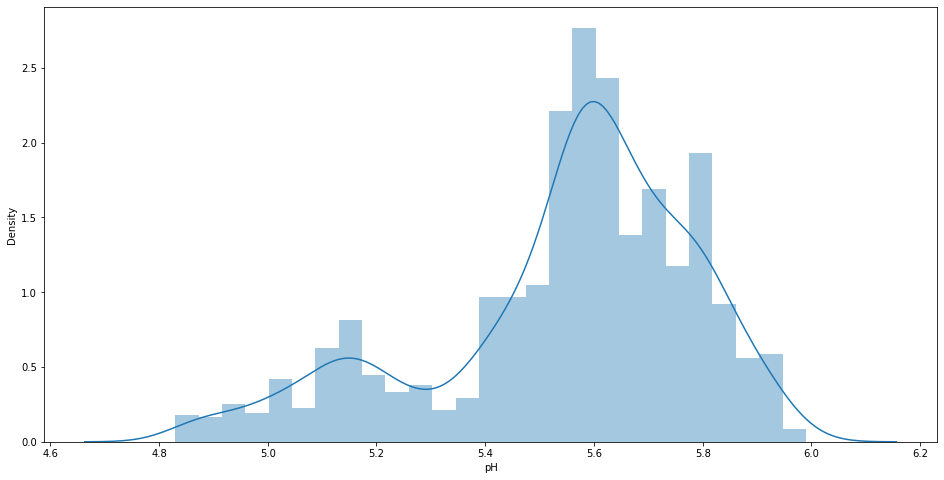

In [205]:
import seaborn as sns
sns.distplot(cP) 

In [206]:
#variancia 

print(var)

0.0597752999029216


In [207]:
#desvio padrão
des = np.std(cP)
print(des)

0.24448987689252413


In [208]:
#Assimetria (Skewness)
assimetria = cP.skew()
print('Assimetria(Skewness) ', assimetria)

Assimetria(Skewness)  -0.8914460163002456


In [209]:
#Curtose (Kurtosis)
curtose = cP.kurtosis()
print('Curtose ', curtose)

Curtose  0.2467559676118407
